임수진, 디지털 경영 트랙, 석사 1학기

참고자료

In [3]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
df_train = pd.read_csv("/Users/soojinlim/JupyterProjects/파이썬공부/python-data-analysis-master/data/titanic_train.csv")
df_test = pd.read_csv("/Users/soojinlim/JupyterProjects/파이썬공부/python-data-analysis-master/data/titanic_test.csv")

### <Step1. 탐색> : Titanic 데이터 살펴보기

##### 데이터 피처 설명
- pclass : Passenger Class, 승객 등급
- survived : 생존 여부
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 탑승 한 형제/배우자 수
- parch : 탑승 한 부모/자녀 수
- ticket : 티켓 번호
- fare : 승객 지불 요금
- cabin : 선실 이름
- embarked : 승선항 (C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼)
- body : 사망자 확인 번호
- home.dest : 고향/목적지

In [4]:
df_train.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


In [8]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB
None


In [9]:
# age, cabin, body, home.dest 피처에 결측치가 존재
print(df_train.isnull().sum())

pclass         0
survived       0
name           0
sex            0
age          175
sibsp          0
parch          0
ticket         0
fare           0
cabin        702
embarked       2
body         831
home.dest    389
dtype: int64


In [10]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     393 non-null    int64  
 1   survived   393 non-null    int64  
 2   name       393 non-null    object 
 3   sex        393 non-null    object 
 4   age        305 non-null    float64
 5   sibsp      393 non-null    int64  
 6   parch      393 non-null    int64  
 7   ticket     393 non-null    object 
 8   fare       393 non-null    float64
 9   cabin      81 non-null     object 
 10  embarked   393 non-null    object 
 11  body       36 non-null     float64
 12  home.dest  218 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 40.0+ KB
None


In [11]:
# age, cabin, body, home.dest 피처에 결측치가 존재
# 위 train 데이터와 같은양의 결측치가 존재하는건 아님
print(df_test.isnull().sum())

pclass         0
survived       0
name           0
sex            0
age           88
sibsp          0
parch          0
ticket         0
fare           0
cabin        312
embarked       0
body         357
home.dest    175
dtype: int64


In [13]:
# 지금 당장 분석에 필요 없거나 큰 의미를 가지고 있지 않은 피처 제거
# body 사망자 확인 정보는 필요한 피처일까 했지만 너무 많은 결측치를 가지고 있음
df_train = df_train.drop(['ticket', 'body', 'home.dest'], axis=1)
df_test = df_test.drop(['ticket', 'body', 'home.dest'], axis=1)

In [14]:
df_train

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.00,0,1,19.5000,NaN,S
1,2,1,"Wells, Miss. Joan",female,4.00,1,1,23.0000,NaN,S
2,2,1,"Duran y More, Miss. Florentina",female,30.00,1,0,13.8583,NaN,C
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,7.7250,NaN,Q
4,3,1,"Bradley, Miss. Bridget Delia",female,22.00,0,0,7.7250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...
911,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,20.5750,NaN,S
912,3,0,"Guest, Mr. Robert",male,NaN,0,0,8.0500,NaN,S
913,3,1,"Smyth, Miss. Julia",female,NaN,0,0,7.7333,NaN,Q
914,2,1,"Sincock, Miss. Maude",female,20.00,0,0,36.7500,NaN,S


0    563
1    353
Name: survived, dtype: int64


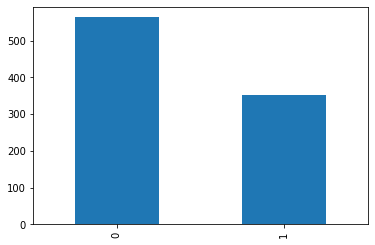

In [16]:
# 얼마나 생존하고 죽었을까
print(df_train['survived'].value_counts())
df_train['survived'].value_counts().plot.bar()

In [22]:
print(df_train['pclass'].value_counts())

3    498
1    230
2    188
Name: pclass, dtype: int64


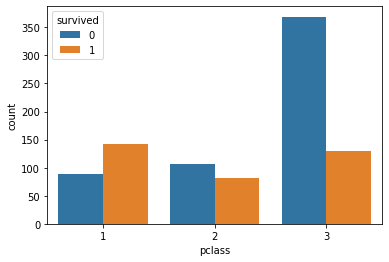

In [24]:
# 승객등급이 3에 가까울수록 생존 확률이 낮아지고, 1에 가까워질수록 생존 확률이 높다
ax = sns.countplot(x='pclass', hue='survived', data=df_train)

In [55]:
from scipy import stats

# 두 집단의 피처를 비교해주며 탐색작업을 자동화하는 함수를 정의합니다.
def valid_features(df, col_name, distribution_check=True):
    
    # 두 집단 (survived=1, survived=0)의 분포 그래프를 출력합니다.
    g = sns.FacetGrid(df, col='survived')
    g.map(plt.hist, col_name, bins=30)
    
    # 생존했을 경우 표준편차
    titanic_survived = df[df['survived']==1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print("Survived data mean is", '%.2f' % np.mean(titanic_survived_static))
    print("Survived data std is", '%.2f' % np.std(titanic_survived_static))

    # 죽었을 경우
    titanic_not_survived = df[df['survived']==0]
    titanic_not_survived_static = np.array(titanic_not_survived[col_name])
    print("Not survived data mean is", '%.2f' % np.mean(titanic_not_survived_static))
    print("Not survived data std is", '%.2f' % np.std(titanic_not_survived_static))
    print("\n")
    
    tTestResult = stats.ttest_ind(titanic_survived[col_name], titanic_not_survived[col_name])
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], titanic_not_survived[col_name], equal_var=False)
    print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
    print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f." % tTestResultDiffVar)
    print("\n")
    
    if distribution_check:
        print("The w-statistic and p-value in Survived %.3f and %.3f" % stats.shapiro(titanic_survived[col_name]))
        print("The w-statistic and p-value in None-Survived %.3f and %.3f" % stats.shapiro(titanic_not_survived[col_name]))

Survived data mean is 29.90
Survived data std is 14.22
Not survived data mean is 30.47
Not survived data std is 13.71


The t-statistic and p-value assuming equal variances is -0.546 and 0.585.
The t-statistic and p-value not assuming equal variances is -0.543 and 0.587.


The w-statistic and p-value in Survived 0.982 and 0.001
The w-statistic and p-value in None-Survived 0.968 and 0.000


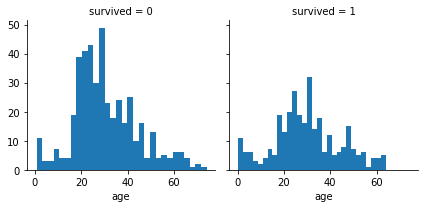

In [58]:
# 앞서 정의한 valid_features 함수를 실행합니다. age 피처를 탐색합니다.
# 두 그룹 간의 평균 차이가 없기 때문에 생존자 분류에 미치는 영향력이 매우 낮음
valid_features(df_train[df_train['age'] > 0], 'age', distribution_check=True)

Survived data mean is 0.43
Survived data std is 0.64
Not survived data mean is 0.60
Not survived data std is 1.34


The t-statistic and p-value assuming equal variances is -2.118 and 0.034.
The t-statistic and p-value not assuming equal variances is -2.446 and 0.015.




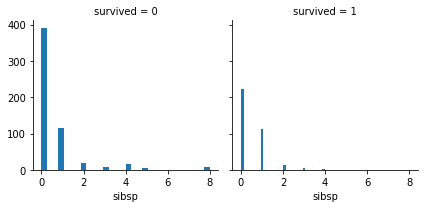

In [59]:
# 두 그룹간의 평균 차이가 어느정도 존재함
valid_features(df_train, 'sibsp', distribution_check=False)